## Step 1: Import Libraries

The following libraries are used:
- **NumPy**: For numerical computations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib and Seaborn**: For visualizing data and model performance.
- **scikit-learn**:
  - To split the dataset into training and testing sets.
  - To transform features into polynomial features.
  - To fit and evaluate the Polynomial Linear Regression model.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Step 2: Load the Dataset

The dataset is loaded using **Pandas**. Ensure the dataset contains:
- At least one feature (independent variable).
- A target column (dependent variable).

The first few rows of the dataset are displayed to understand its structure.

In [2]:
data = pd.read_csv('Weight-Height_Dataset.csv')

In [3]:
data.head(10)

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292
5,52.479562,72.763524
6,44.646689,70.593309
7,109.294092,180.248443
8,88.089201,124.778436
9,96.645806,133.024327


## Step 3: Explore the Dataset

Basic exploration is performed to:
1. Check for null or missing values.
2. Understand the data types and summary statistics.

This ensures the dataset is ready for modeling.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  50 non-null     float64
 1   Height  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [12]:
data.describe()

,Weight,Height
count,50.000000,50.000000
mean,75.673912,111.473633
std,23.110656,39.493803
min,41.646760,68.971292
25%,54.701360,79.966731
50%,74.883900,98.819101
75%,91.988395,129.709758
max,117.592788,202.663424


## Step 4: Visualize the Dataset Before Splitting

A scatter plot is created to visualize the relationship between the independent variable (**Feature**) and the dependent variable (**Target**).  

### Purpose:
- To observe the spread of data points.
- To identify any non-linear patterns that justify using **Polynomial Linear Regression**.

### Interpretation:
- If the scatter points do not align well in a straight line, a polynomial relationship might better fit the data.


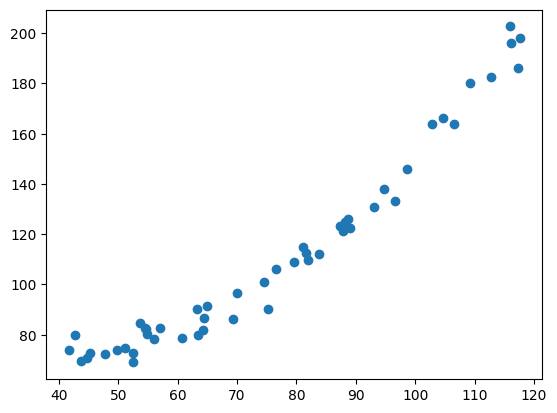

In [6]:
plt.scatter(x=data['Weight'], y= data['Height'])
plt.show()

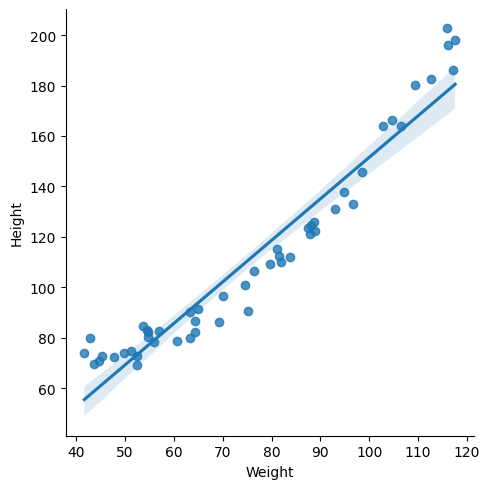

In [9]:
sns.lmplot(x='Weight',y='Height', data=data)

## Step 5: Split the Dataset

The dataset is split into:
1. **Training Set**: Used to train the model.
2. **Test Set**: Used to evaluate the model's performance.

The split is done using `train_test_split` with an 80-20 ratio.


In [20]:
x = data.iloc[:,0:1].values #Weight
y = data.iloc[:,1] #Height

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=44)

In [24]:
x_train.shape

(40, 1)

In [25]:
x_test.shape

(10, 1)

In [26]:
y_train.shape

(40,)

In [27]:
y_train.shape

(40,)

## Step 6: Transform Features to Polynomial

The **PolynomialFeatures** class is used to transform the independent variable(s) into polynomial terms.  
- Degree of the polynomial: **2** (can be changed for experimentation).

The transformed features capture non-linear relationships between the variables.


In [28]:
poly = PolynomialFeatures(degree=2)

In [33]:
poly_x_train = poly.fit_transform(x_train)

In [34]:
poly_xtest = poly.fit_transform(x_test)

## Step 7: Train the Model

A **Linear Regression** model is trained using the polynomial-transformed features.  
This step fits the model to the training data and learns the coefficients for the polynomial terms.


In [30]:
model = LinearRegression()

In [36]:
model.fit(poly_x_train,y_train)

LinearRegression()

## Step 8: Evaluate the Model

The model's performance is evaluated using:
1. **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
2. **R² Score**: Indicates how well the model explains the variability of the target variable.

The results are as follows:
- **MSE**: Indicates the prediction accuracy.
- **R² Score**: Indicates the goodness of fit.


In [42]:
# Evaluate the model
y_pred = model.predict(poly_xtest)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 19.96199871856845
R² Score: 0.98641785717998


## Step 9: Visualize the Results

A scatter plot is created to compare **Actual** and **Predicted** values:
- **Blue dots** represent the actual values.
- **Orange dots** represent the predicted values.

This visualization helps assess how closely the predicted values match the actual values.


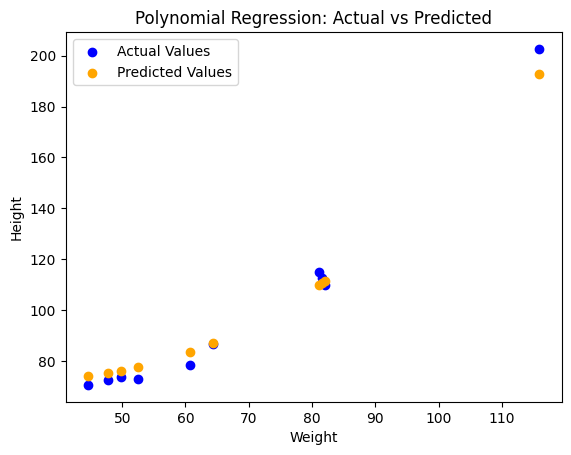

In [45]:
# Visualize actual vs predicted values
plt.scatter(x_test, y_test, color='blue', label='Actual Values')
plt.scatter(x_test, y_pred, color='orange', label='Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

## Step 9: Save the Model

The trained model is saved using **Joblib** for reuse.  
The file is named `polynomial_model.joblib` and can be loaded later for predictions or deployment.


In [46]:
# Save the model using Joblib
import joblib
joblib.dump(model, 'polynomial_model.joblib')

print("Model saved as 'polynomial_model.joblib'")


Model saved as 'polynomial_model.joblib'


## Step 11: Conclusion

### Insights:
1. **Before Visualization**: 
   - The scatter plot of the feature vs. target revealed a non-linear pattern in the data. 
   - A simple linear regression model would not have captured this complexity effectively, justifying the use of **Polynomial Linear Regression**.

2. **Model Performance**: 
   - The model achieved an **R² score of 0.98**, indicating that 98% of the variance in the target variable is explained by the model.
   - The **Mean Squared Error (MSE)** of 19.96 shows the model has low error in predicting the target values.

3. **Comparison of Actual vs. Predicted Values**:
   - The scatter plot of actual vs. predicted values demonstrates a strong alignment, confirming the polynomial model's ability to closely approximate the target values.

### Conclusion:
The high R² score and low MSE highlight the success of Polynomial Linear Regression in modeling the data's non-linear relationship. This model is suitable for predicting target values with high accuracy. Potential future steps include:
- Experimenting with different polynomial degrees to explore overfitting or underfitting.
- Extending the model to include additional features for a more comprehensive analysis.
- Testing the model on new data to validate its robustness.

This project underscores the importance of selecting the right regression approach for non-linear data patterns.
